In [5]:
from google.colab import files
uploaded=files.upload()

Saving no_outlier_telecomm.csv to no_outlier_telecomm (1).csv


In [6]:
import pandas as pd
df=pd.read_csv("no_outlier_telecomm.csv")
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


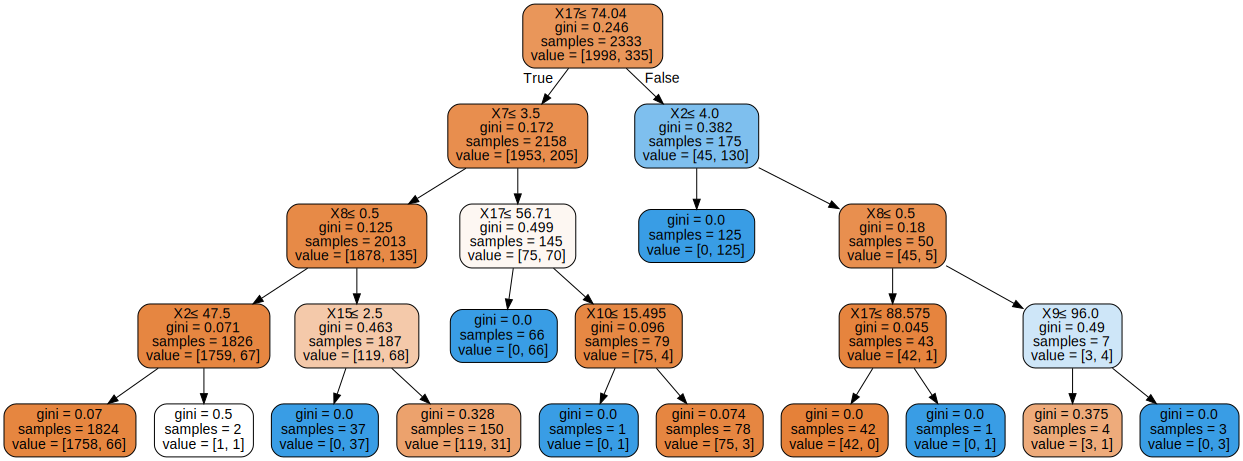

In [102]:
#Decision Tree and its representation
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(Classifier,out_file=None,
                              filled=True,rounded=True, #filled to add color to same category data, Male one color and female one color, rounded = to round values to avoid lot of numbers
                              special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [53]:
#defining the variables
Y=df["churn"]
X=df.drop("churn", axis = 1)

In [54]:
#Data Partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [89]:
#Model fitting using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier  
Classifier = DecisionTreeClassifier(max_depth = 4) 
Classifier.fit(X_train, Y_train)
Classifier

#calculating Node counts and max depth
print("Node Counts :",Classifier.tree_.node_count)
print("Max Depth:",Classifier.tree_.max_depth)

#Finding out Y Predicted values for Test and Train Data
Y_pred_train = Classifier.predict(X_train)
Y_pred_test = Classifier.predict(X_test)

#Y_pred value and Accuracy Score
Y_pred=Classifier.predict(X_train)
from sklearn.metrics import accuracy_score
Training_accuracy =accuracy_score(Y_train,Y_pred_train).round(3)
Test_accuracy =accuracy_score(Y_test,Y_pred_test).round(3)
print("Training_accuracy: ", Training_accuracy.round(3))
print("Test_accuracy: ", Test_accuracy.round(3))

#Confusion metrix
from sklearn.metrics import confusion_matrix
cm_train=confusion_matrix(Y_train,Y_pred_train)
print(cm_train)
cm_test=confusion_matrix(Y_test,Y_pred_test)
print(cm_test)

#Using classification report for finding out Precision score/Recall/F1 Score and Support
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))
print(classification_report(Y_train, Y_pred_train))

Node Counts : 23
Max Depth: 4
Training_accuracy:  0.956
Test_accuracy:  0.967
[[1998    0]
 [ 102  233]]
[[851   1]
 [ 32 116]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       852
           1       0.99      0.78      0.88       148

    accuracy                           0.97      1000
   macro avg       0.98      0.89      0.93      1000
weighted avg       0.97      0.97      0.97      1000

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1998
           1       1.00      0.70      0.82       335

    accuracy                           0.96      2333
   macro avg       0.98      0.85      0.90      2333
weighted avg       0.96      0.96      0.95      2333



In [55]:
#model fitting using Decision Tree Classifier using entropy
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion="entropy",max_depth=5)
Classifier.fit(X_train,Y_train)
Classifier

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [56]:
#calculating Node counts and max depth
print("Node Counts :",Classifier.tree_.node_count)
print("Max Depth:",Classifier.tree_.max_depth)

Node Counts : 35
Max Depth: 5


In [61]:
#Y_pred value and Accuracy Score
Y_pred_train= Classifier.predict(X_train)
Y_pred_test=Classifier.predict(X_test)

from sklearn.metrics import accuracy_score
Y_pred=Classifier.predict(X_train)
Training_acc=accuracy_score(Y_train,Y_pred_train).round(3)
Training_acc

Test_acc=accuracy_score(Y_test,Y_pred_test).round(3)
Test_acc

print("Training_accuracy :", Training_acc.round(3))
print("Test_accuracy :", Test_acc.round(3))

Training_accuracy : 0.977
Test_accuracy : 0.959


In [63]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(Y_train,Y_pred_train)
confusion_matrix_test = confusion_matrix(Y_test,Y_pred_test)
confusion_matrix

TN_train = confusion_matrix_train[0,0]
FP_train = confusion_matrix_train[1,0]
TNR_train = TN_train/(TN_train + FP_train)
print("Specificity score_train:", TNR_train.round(3))

TN_test = confusion_matrix_test[0,0]
FP_test = confusion_matrix_test[1,0]
TNR_test = TN_test/(TN_test + FP_test)
print("Specificity score_test:", TNR_test.round(3))

from sklearn.metrics import recall_score,precision_score,f1_score

rs_train =  recall_score(Y_train,Y_pred_train)
rs_test =  recall_score(Y_test,Y_pred_test)
print("Sensitivity/Recall score_train:", rs_train.round(3))
print("Sensitivity/Recall score_test:", rs_test.round(3))

ps_train =  precision_score(Y_train,Y_pred_train)
ps_test =  precision_score(Y_test,Y_pred_test)
print("precision score: Test", ps_test.round(3))
print("precision score: Train", ps_train.round(3))

f1s_train =  f1_score(Y_train,Y_pred_train)
f1s_test =  f1_score(Y_test,Y_pred_test)
print("F1 score_train:", f1s_train.round(3))
print("F1 score_test:", f1s_test.round(3))

Specificity score_train: 0.974
Specificity score_test: 0.955
Sensitivity/Recall score_train: 0.838
Sensitivity/Recall score_test: 0.732
precision score: Test 0.991
precision score: Train 1.0
F1 score_train: 0.912
F1 score_test: 0.842


In [103]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator= DecisionTreeClassifier(max_depth = 4),
                     n_estimators=1400,max_samples=0.7,
                     random_state=7,max_features = 0.5) #here 500 is, model is building 500 trees to check errors

#Model Fitting
bag.fit(X_train,Y_train)

#Predicted values
Y_pred_train= bag.predict(X_train)
Y_pred_test=bag.predict(X_test)

Training_accuracy =accuracy_score(Y_train,Y_pred_train).round(2)
Test_accuracy =accuracy_score(Y_test,Y_pred_test).round(2)
print("Training_accuracy: ", Training_accuracy.round(2))
print("Test_accuracy: ", Test_accuracy.round(2))

#Confusion metrix
from sklearn.metrics import confusion_matrix
cm_train=confusion_matrix(Y_train,Y_pred_train)
print(cm_train)
cm_test=confusion_matrix(Y_test,Y_pred_test)
print(cm_test)

#Using classification report for finding out Precision score/Recall/F1 Score and Support
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))
print(classification_report(Y_train, Y_pred_train))

Training_accuracy:  0.93
Test_accuracy:  0.93
[[1998    0]
 [ 168  167]]
[[852   0]
 [ 70  78]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       852
           1       1.00      0.53      0.69       148

    accuracy                           0.93      1000
   macro avg       0.96      0.76      0.83      1000
weighted avg       0.94      0.93      0.92      1000

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1998
           1       1.00      0.50      0.67       335

    accuracy                           0.93      2333
   macro avg       0.96      0.75      0.81      2333
weighted avg       0.93      0.93      0.92      2333



In [48]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=300, max_depth=3,max_features=0.6, max_samples=0.7) #here 750 is, model is building 750 trees to check

RFC.fit(X_train,Y_train)

Y_pred_train= RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

#Accuracy Score
Training_accuracy =accuracy_score(Y_train,Y_pred_train).round(2)
Test_accuracy =accuracy_score(Y_test,Y_pred_test).round(2)
print("Training_accuracy: ", Training_accuracy.round(2))
print("Test_accuracy: ", Test_accuracy.round(2))

Training_accuracy:  0.94
Test_accuracy:  0.95


In [66]:
#Confusion metrix
from sklearn.metrics import confusion_matrix
cm_train=confusion_matrix(Y_train,Y_pred_train)
print(cm_train)
cm_test=confusion_matrix(Y_test,Y_pred_test)
print(cm_test)

#Using classification report for finding out Precision score/Recall/F1 Score and Support
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))
print(classification_report(Y_train, Y_pred_train))

[[1999    0]
 [  88  246]]
[[850   1]
 [ 55  94]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       851
           1       0.99      0.63      0.77       149

    accuracy                           0.94      1000
   macro avg       0.96      0.81      0.87      1000
weighted avg       0.95      0.94      0.94      1000

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1999
           1       1.00      0.74      0.85       334

    accuracy                           0.96      2333
   macro avg       0.98      0.87      0.91      2333
weighted avg       0.96      0.96      0.96      2333



In [67]:
#Decision Tree using entropy - NOT REQUIRED
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",max_depth=5)
classifier.fit(X_train,Y_train)

Y_pred_train =classifier.predict(X_train)
Y_pred_train

Y_pred_test =classifier.predict(X_test)
Y_pred_test

#calculating Node counts and max depth
print("Node Counts :",Classifier.tree_.node_count)
print("Max Depth:",Classifier.tree_.max_depth)

#accuracy Score
from sklearn.metrics import accuracy_score

ac1=accuracy_score(Y_train, Y_pred_train)
ac2=accuracy_score(Y_test, Y_pred_test)
print("Training  Score:",ac1.round(3))
print("Test Score:",ac2.round(3))

#confusion metrics
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test,Y_pred_test)
print(cm1)
cm2=confusion_matrix(Y_train,Y_pred_train)
print(cm2)

#Using classification report for finding out Precision score/Recall/F1 Score and Support
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))
print(classification_report(Y_train, Y_pred_train))


Node Counts : 35
Max Depth: 5
Training  Score: 0.977
Test Score: 0.96
[[850   1]
 [ 39 110]]
[[1999    0]
 [  54  280]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       851
           1       0.99      0.74      0.85       149

    accuracy                           0.96      1000
   macro avg       0.97      0.87      0.91      1000
weighted avg       0.96      0.96      0.96      1000

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1999
           1       1.00      0.84      0.91       334

    accuracy                           0.98      2333
   macro avg       0.99      0.92      0.95      2333
weighted avg       0.98      0.98      0.98      2333



In [68]:
#Random Forest using Gini Index
from sklearn.ensemble  import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=3,max_features=0.5, max_samples=0.7)

#fitting the model
rfc.fit(X_train,Y_train)

Y_pred_train =rfc.predict(X_train)
Y_pred_train

Y_pred_test =rfc.predict(X_test)
Y_pred_test

#Accuracy score
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train, Y_pred_train)
ac2=accuracy_score(Y_test, Y_pred_test)
print("Training  Score:",ac1.round(3))
print("Test Score:",ac2.round(3))

#Confusion metrix
from sklearn.metrics import confusion_matrix
cm_train=confusion_matrix(Y_train,Y_pred_train)
print(cm_train)
cm_test=confusion_matrix(Y_test,Y_pred_test)
print(cm_test)

#Using classification report for finding out Precision score/Recall/F1 Score and Support
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))
print(classification_report(Y_train, Y_pred_train))

Training  Score: 0.941
Test Score: 0.921
[[1999    0]
 [ 138  196]]
[[851   0]
 [ 79  70]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       851
           1       1.00      0.47      0.64       149

    accuracy                           0.92      1000
   macro avg       0.96      0.73      0.80      1000
weighted avg       0.93      0.92      0.91      1000

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1999
           1       1.00      0.59      0.74       334

    accuracy                           0.94      2333
   macro avg       0.97      0.79      0.85      2333
weighted avg       0.94      0.94      0.93      2333



In [69]:
#Random Forest using Entropy
from sklearn.ensemble  import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=4,max_features=0.5, max_samples=0.7)

#fitting the model
rfc.fit(X_train,Y_train)

Y_pred_train =rfc.predict(X_train)
Y_pred_train

Y_pred_test =rfc.predict(X_test)
Y_pred_test

#Accuracy score
from sklearn.metrics import accuracy_score

ac1=accuracy_score(Y_train, Y_pred_train)
ac2=accuracy_score(Y_test, Y_pred_test)
print("Training  Score:",ac1.round(3))
print("Test Score:",ac2.round(3))

#Confusion metrics
from sklearn.metrics import confusion_matrix
cm_train=confusion_matrix(Y_train,Y_pred_train)
print(cm_train)
cm_test=confusion_matrix(Y_test,Y_pred_test)
print(cm_test)

#Using classification report for finding out Precision score/Recall/F1 Score and Support
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))
print(classification_report(Y_train, Y_pred_train))

Training  Score: 0.962
Test Score: 0.942
[[1999    0]
 [  89  245]]
[[850   1]
 [ 57  92]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       851
           1       0.99      0.62      0.76       149

    accuracy                           0.94      1000
   macro avg       0.96      0.81      0.86      1000
weighted avg       0.94      0.94      0.94      1000

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1999
           1       1.00      0.73      0.85       334

    accuracy                           0.96      2333
   macro avg       0.98      0.87      0.91      2333
weighted avg       0.96      0.96      0.96      2333



In [70]:
#Using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
GBR = GradientBoostingClassifier(n_estimators=250, max_depth=8,max_features=0.7,random_state=10,learning_rate=0.01)

GBR.fit(X_train, Y_train)
Y_pred_train = GBR.predict(X_train) 
Y_pred_test = GBR.predict(X_test)

#Accuracy score
from sklearn.metrics import accuracy_score

ac1=accuracy_score(Y_train, Y_pred_train)
ac2=accuracy_score(Y_test, Y_pred_test)
print("Training  Score:",ac1.round(3))
print("Test Score:",ac2.round(3))

#Confusion metrix
from sklearn.metrics import confusion_matrix
cm_train=confusion_matrix(Y_train,Y_pred_train)
print(cm_train)
cm_test=confusion_matrix(Y_test,Y_pred_test)
print(cm_test)

#Using classification report for finding out Precision score/Recall/F1 Score and Support
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))
print(classification_report(Y_train, Y_pred_train))


Training  Score: 0.983
Test Score: 0.96
[[1999    0]
 [  40  294]]
[[850   1]
 [ 39 110]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       851
           1       0.99      0.74      0.85       149

    accuracy                           0.96      1000
   macro avg       0.97      0.87      0.91      1000
weighted avg       0.96      0.96      0.96      1000

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1999
           1       1.00      0.88      0.94       334

    accuracy                           0.98      2333
   macro avg       0.99      0.94      0.96      2333
weighted avg       0.98      0.98      0.98      2333



In [111]:
#Using AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ABR = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, max_features=0.6),n_estimators=150,
                                random_state=None,learning_rate=0.01)

#Model Fitting
ABR.fit(X_train, Y_train)

#predicted values
Y_pred_train = ABR.predict(X_train) 
Y_pred_test = ABR.predict(X_test)

#Accuracy score
from sklearn.metrics import accuracy_score

ac1=accuracy_score(Y_train, Y_pred_train)
ac2=accuracy_score(Y_test, Y_pred_test)
print("Training  Score:",ac1.round(3))
print("Test Score:",ac2.round(3))

#confusion metrix
from sklearn.metrics import confusion_matrix
cm_train=confusion_matrix(Y_train,Y_pred_train)
print(cm_train)
cm_test=confusion_matrix(Y_test,Y_pred_test)
print(cm_test)

#Using classification report for finding out Precision score/Recall/F1 Score and Support
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))
print(classification_report(Y_train, Y_pred_train))

Training  Score: 0.971
Test Score: 0.977
[[1998    0]
 [  67  268]]
[[851   1]
 [ 22 126]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       852
           1       0.99      0.85      0.92       148

    accuracy                           0.98      1000
   macro avg       0.98      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1998
           1       1.00      0.80      0.89       335

    accuracy                           0.97      2333
   macro avg       0.98      0.90      0.94      2333
weighted avg       0.97      0.97      0.97      2333



In [87]:
#Cross validation for Ada Boost - Optional
import numpy as np
Train_acc=[]
Test_acc=[]

for i in (1,250):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=i) 
    ABR = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=250,
                                    random_state=10,learning_rate=2)
    ABR.fit(X_train, Y_train)
    Y_pred_train = ABR.predict(X_train) 
    Y_pred_test = ABR.predict(X_test) 
    Train_acc.append(accuracy_score(Y_train, Y_pred_train).round(2))
    Test_acc.append(accuracy_score(Y_test, Y_pred_test).round(2))

print("average Train acc of ada Error :", np.mean(Train_acc).round(2))
print("average Test acc of ada Error :", np.mean(Test_acc).round(2))

average Train acc of ada Error : 1.0
average Test acc of ada Error : 0.93


In [90]:
#Using XG boost
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=250,gamma=10,reg_lambda=1, learning_rate=0.1)

#Model Fitting
xgb.fit(X_train,Y_train)

Y_pred_train =xgb.predict(X_train)
Y_pred_train

Y_pred_test =xgb.predict(X_test)
Y_pred_test

#Accuracy score
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train, Y_pred_train)
ac2=accuracy_score(Y_test, Y_pred_test)
print("Training  Score:",ac1.round(3))
print("Test Score:",ac2.round(3))

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test,Y_pred_test)
print(cm1)
cm2=confusion_matrix(Y_train,Y_pred_train)
print(cm2)

#Using classification report for finding out Precision score/Recall/F1 Score and Support
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))
print(classification_report(Y_train, Y_pred_train))

Training  Score: 0.968
Test Score: 0.977
[[852   0]
 [ 23 125]]
[[1998    0]
 [  74  261]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       852
           1       1.00      0.84      0.92       148

    accuracy                           0.98      1000
   macro avg       0.99      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1998
           1       1.00      0.78      0.88       335

    accuracy                           0.97      2333
   macro avg       0.98      0.89      0.93      2333
weighted avg       0.97      0.97      0.97      2333



In [88]:
#Using XG boost - other code for confusion matrix
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=250,gamma=10,reg_lambda=1, learning_rate=1)

#Model Fitting
xgb.fit(X_train,Y_train)

#Precicted values
Y_pred_train =xgb.predict(X_train)
Y_pred_train

Y_pred_test =xgb.predict(X_test)
Y_pred_test

# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(Y_train,Y_pred_train)
confusion_matrix_test = confusion_matrix(Y_test,Y_pred_test)
confusion_matrix

TN_train = confusion_matrix_train[0,0]
FP_train = confusion_matrix_train[1,0]
TNR_train = TN_train/(TN_train + FP_train)
print("Specificity score_train:", TNR_train.round(3))

TN_test = confusion_matrix_test[0,0]
FP_test = confusion_matrix_test[1,0]
TNR_test = TN_test/(TN_test + FP_test)
print("Specificity score_test:", TNR_test.round(3))

from sklearn.metrics import recall_score,precision_score,f1_score

rs_train =  recall_score(Y_train,Y_pred_train)
rs_test =  recall_score(Y_test,Y_pred_test)
print("Sensitivity/Recall score_train:", rs_train.round(3))
print("Sensitivity/Recall score_test:", rs_test.round(3))

ps_train =  precision_score(Y_train,Y_pred_train)
ps_test =  precision_score(Y_test,Y_pred_test)
print("precision score:", ps_test.round(3))
print("precision score:", ps_train.round(3))

f1s_train =  f1_score(Y_train,Y_pred_train)
f1s_test =  f1_score(Y_test,Y_pred_test)
print("F1 score_train:", f1s_train.round(3))
print("F1 score_test:", f1s_test.round(3))



Specificity score_train: 0.965
Specificity score_test: 0.976
Sensitivity/Recall score_train: 0.785
Sensitivity/Recall score_test: 0.858
precision score: 1.0
precision score: 1.0
F1 score_train: 0.88
F1 score_test: 0.924


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=4)))
models.append(('Decision Tree gini Classifier', DecisionTreeClassifier(criterion="gini",max_depth=4)))
models.append(('Decision Tree  entropy Classifier', DecisionTreeClassifier(criterion="entropy",max_depth=5)))
models.append(('Bagging Classifier', BaggingClassifier(base_estimator= DecisionTreeClassifier(max_depth = 4),n_estimators=500,max_samples=0.7,random_state=7,max_features = 0.5)))
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=300, max_depth=3,max_features=0.6, max_samples=0.7)))
models.append(('Random Forest gini Classifier', RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=4,max_features=0.7)))
models.append(('Random Forest entropy Classifier', RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=4,max_features=0.7)))
models.append(('ADA Boost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, max_features=0.6),n_estimators=150,random_state=None,learning_rate=0.01)))
models.append(('XGB',XGBClassifier(gamma=10,reg_lambda=4,n_estimators=250,learning_rate=0.01)))

In [113]:
# Importing needed packages
from sklearn.metrics import accuracy_score


for title, modelname in models:
    modelname.fit(X_train, Y_train)

    Y_pred_test = modelname.predict(X_test)
    Y_pred_train = modelname.predict(X_train)
    predictions_test = [round(value) for value in Y_pred_test]
    predictions_train = [round(value) for value in Y_pred_train]

    #Evaluating predictions
    accuracy = accuracy_score(Y_test, Y_pred_test)
    print(title,"Accuracy_test: %.2f%%" % (accuracy * 100.0))
    accuracy = accuracy_score(Y_train, Y_pred_train)
    print(title,"Accuracy_train: %.2f%%" % (accuracy * 100.0))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy_test: 85.00%
LogisticRegression Accuracy_train: 85.34%
KNN Accuracy_test: 88.30%
KNN Accuracy_train: 88.81%
SVM Accuracy_test: 85.20%
SVM Accuracy_train: 85.64%
Decision Tree Classifier Accuracy_test: 96.70%
Decision Tree Classifier Accuracy_train: 95.63%
Decision Tree gini Classifier Accuracy_test: 96.70%
Decision Tree gini Classifier Accuracy_train: 95.63%
Decision Tree  entropy Classifier Accuracy_test: 97.60%
Decision Tree  entropy Classifier Accuracy_train: 97.04%
Bagging Classifier Accuracy_test: 92.40%
Bagging Classifier Accuracy_train: 92.41%
Random Forest Classifier Accuracy_test: 94.60%
Random Forest Classifier Accuracy_train: 93.53%
Random Forest gini Classifier Accuracy_test: 97.50%
Random Forest gini Classifier Accuracy_train: 96.96%
Random Forest entropy Classifier Accuracy_test: 97.50%
Random Forest entropy Classifier Accuracy_train: 96.96%
ADA Boost Accuracy_test: 97.60%
ADA Boost Accuracy_train: 97.13%
XGB Accuracy_test: 97.70%
XGB Accuracy_